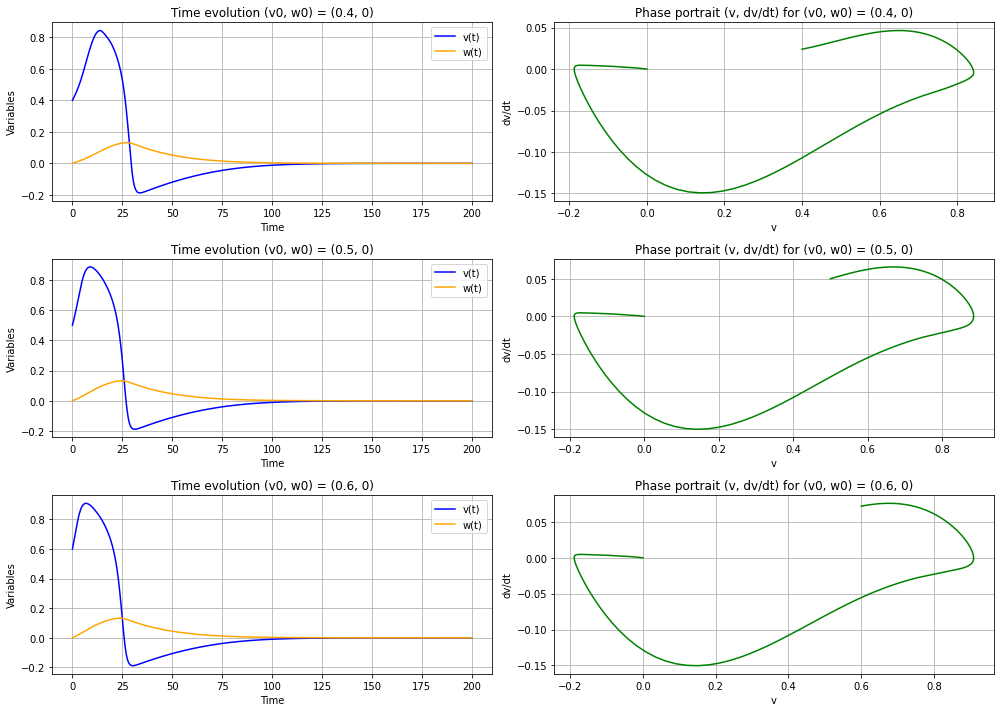

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a = 0.3
E = 0.01
gamma = 2.5
I = 0

def fitzhugh_nagumo(t, y):
    v, w = y
    dv_dt = -v * (v - a) * (v - 1) - w + I
    dw_dt = E * (v - gamma * w)
    return [dv_dt, dw_dt]

t_span = (0, 200)  
t_eval = np.linspace(*t_span, 1000)  
initial_conditions = [(0.4, 0), (0.5, 0), (0.6, 0)] 

solutions = []
for v0, w0 in initial_conditions:
    sol = solve_ivp(fitzhugh_nagumo, t_span, [v0, w0], t_eval=t_eval, method='RK45')
    solutions.append(sol)

plt.figure(figsize=(14, 10))

for i, sol in enumerate(solutions):
    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(sol.t, sol.y[0], label="v(t)", color='blue')
    plt.plot(sol.t, sol.y[1], label="w(t)", color='orange')
    plt.title(f"Time evolution (v0, w0) = {initial_conditions[i]}")
    plt.xlabel("Time")
    plt.ylabel("Variables")
    plt.legend()
    plt.grid()

for i, sol in enumerate(solutions):
    v = sol.y[0]
    w = sol.y[1]
    dv_dt = -v * (v - a) * (v - 1) - w + I 
    plt.subplot(3, 2, 2 * i + 2)
    plt.plot(v, dv_dt, color='green')
    plt.title(f"Phase portrait (v, dv/dt) for (v0, w0) = {initial_conditions[i]}")
    plt.xlabel("v")
    plt.ylabel("dv/dt")
    plt.grid()

plt.tight_layout()
plt.show()

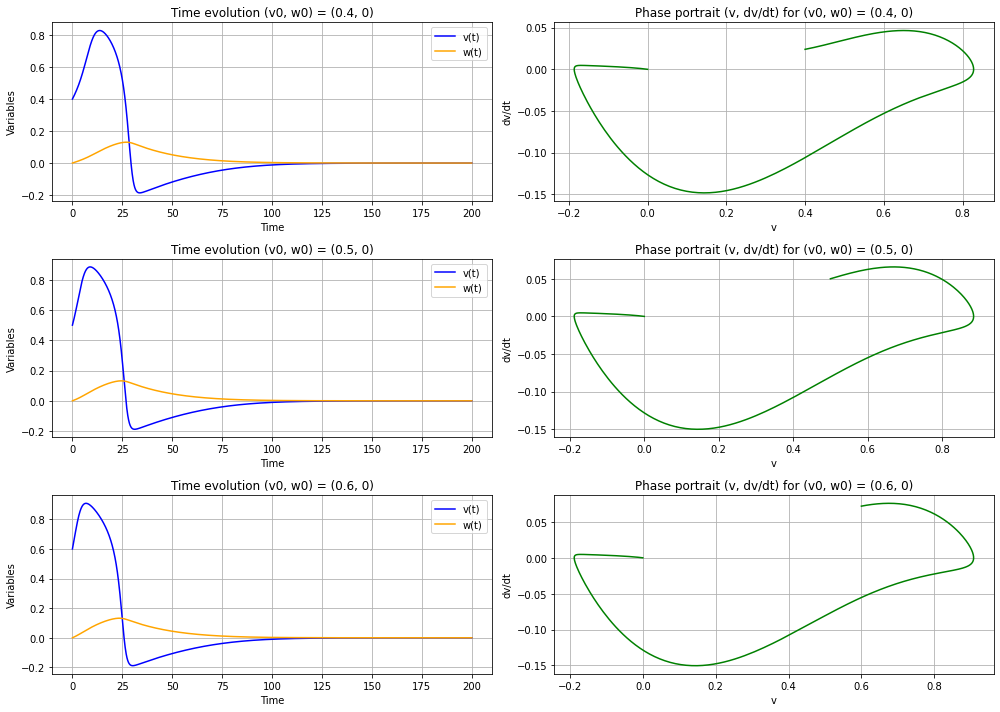

In [5]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.3
E = 0.01
gamma = 2.5
I = 0

def f(t, y):
    v, w = y
    dv_dt = -v * (v - a) * (v - 1) - w + I
    dw_dt = E * (v - gamma * w)
    return np.array([dv_dt, dw_dt])

def runge_kutta_4th_order(f, y0, t_values):
    n = len(t_values)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(1, n):
        h = t_values[i] - t_values[i-1]
        k1 = f(t_values[i-1], y[i-1])
        k2 = f(t_values[i-1] + h/2, y[i-1] + h * k1 / 2)
        k3 = f(t_values[i-1] + h/2, y[i-1] + h * k2 / 2)
        k4 = f(t_values[i-1] + h, y[i-1] + h * k3)
        y[i] = y[i-1] + h * (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

initial_conditions = [(0.4, 0), (0.5, 0), (0.6, 0)]
t_values = np.linspace(0, 200, 2000)

solutions = []
for y0 in initial_conditions:
    solutions.append(runge_kutta_4th_order(f, y0, t_values))

plt.figure(figsize=(14, 10))

# Графики v(t) и w(t)
for i, (sol, y0) in enumerate(zip(solutions, initial_conditions)):
    v, w = sol[:, 0], sol[:, 1]
    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(t_values, v, label="v(t)", color='blue')
    plt.plot(t_values, w, label="w(t)", color='orange')
    plt.title(f"Time evolution (v0, w0) = {y0}")
    plt.xlabel("Time")
    plt.ylabel("Variables")
    plt.legend()
    plt.grid()

# Фазовые портреты
for i, (sol, y0) in enumerate(zip(solutions, initial_conditions)):
    v, w = sol[:, 0], sol[:, 1]
    dv_dt = -v * (v - a) * (v - 1) - w + I
    plt.subplot(3, 2, 2 * i + 2)
    plt.plot(v, dv_dt, color='green')
    plt.title(f"Phase portrait (v, dv/dt) for (v0, w0) = {y0}")
    plt.xlabel("v")
    plt.ylabel("dv/dt")
    plt.grid()

plt.tight_layout()
plt.show()
